In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

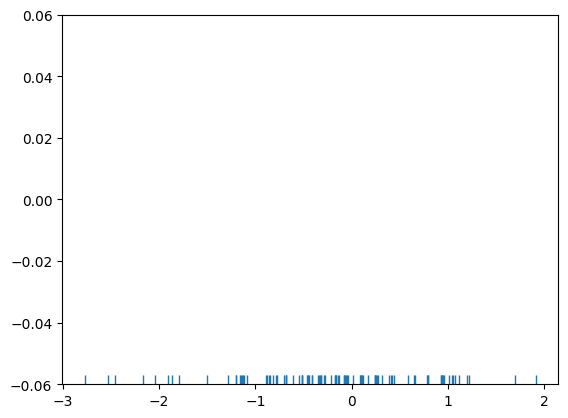

In [ ]:
dataset=np.random.randn(100)
sns.rugplot(dataset);
x_min=dataset.min()-4.3
x_max=dataset.max()+3.9
x_axis=np.linspace(x_min,x_max,100)

In [ ]:
print(x_min,x_max)

-7.074207044566309 5.8104449490401215


In [ ]:
url='http:/en.wikipedia.org/wiki/kernel_density_estimation'
bandwidth=((4*dataset.std()**-0.5)/(3*len(dataset)))**0.2
bandwidth

0.42533157888349094

(0.0, 1.0)

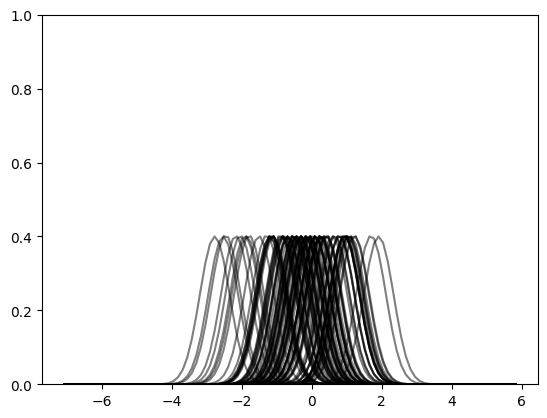

In [ ]:
#creating an empty kernel list
kernel_list=[]
#plot each basis function
for data_point in dataset:
  #create a kernel for each point and append to list
  kernel=stats.norm(data_point,bandwidth).pdf(x_axis)
  kernel_list.append(kernel)
  #scale for plotting
  kernel=kernel/kernel.max()
  kernel=kernel*.4
  plt.plot(x_axis,kernel,color='black',alpha=0.5)
plt.ylim(0,1)


Text(0.5, 0.98, 'sum of the basis function')

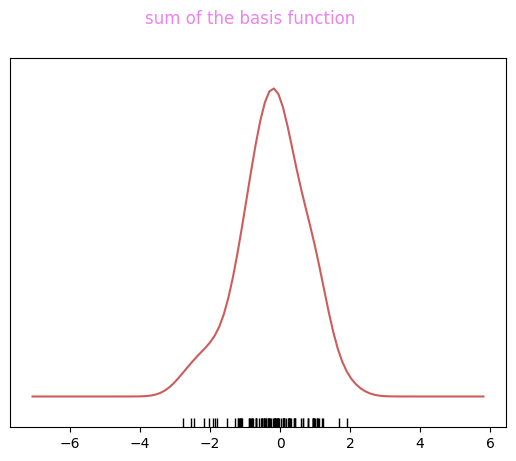

In [ ]:
sum=np.sum(kernel_list,axis=0)
fig=plt.plot(x_axis,sum,color='indianred')
sns.rugplot(dataset,c='black')
plt.yticks([])
plt.suptitle("sum of the basis function",c='violet')

In [ ]:
import numpy as np
import cv2

from sklearn.datasets  import fetch_california_housing
from sklearn import metrics
from sklearn import model_selection
from sklearn import linear_model
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({'font.size':16})

In [ ]:
housing = fetch_california_housing()

In [ ]:
dir(housing)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [ ]:
housing.data.shape

(20640, 8)

In [ ]:
housing.target.shape

(20640,)

In [ ]:
dir(housing.target_names)

['__add__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

In [ ]:
dir(housing.data)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',

In [ ]:
ridgereg=linear_model.Ridge()

In [ ]:
x_train,x_test,y_train,y_test = model_selection.train_test_split(housing.data,housing.target,test_size=0.3,random_state=42)

In [ ]:
ridgereg.fit(x_train,y_train)

Ridge()

In [ ]:
metrics.mean_squared_error(y_train,ridgereg.predict(x_train))

0.5233577422311327

In [ ]:
ridgereg.score(x_train,y_train)

0.6093458881478931

In [ ]:
y_pred=ridgereg.predict(x_test)

In [ ]:
metrics.mean_squared_error(y_test,y_pred)

0.5305052690933699

Text(0, 0.5, 'target value')

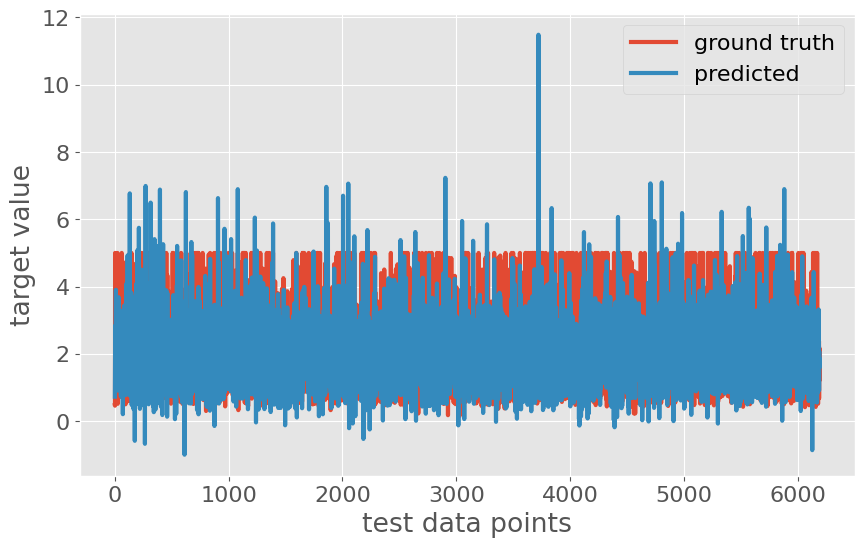

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(y_test,linewidth=3,label='ground truth')
plt.plot(y_pred,linewidth=3,label='predicted')
plt.legend(loc='best')
plt.xlabel('test data points')
plt.ylabel('target value')

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(y_test,y_pred,'o')
plt.plot([-10,60],[-10,60],k--)
plt.axis([-10,60],[-10,60])
plt.xlabel('ground truth')
plt.ylabel('predicted')
scorestr=r'R$^2$=%.3f'% ridgereg.score(x_test,y_test)
errstr='MSE=%.3f'% metrics.mean_squared_error(y_test,y_pred)
plt.text(-5,50,scorestr,fontsize=12)
plt.text(-5,50,errstr,fontsize=12)

SyntaxError: ignored